# Simple Working AutoEncoder Demo

Let's start with the absolute basics and build up step by step.

## Step 1: Test basic imports first

In [2]:
# Test absolute basic imports
print("Testing basic imports...")

try:
    import torch
    print("✅ torch imported")
except Exception as e:
    print(f"❌ torch failed: {e}")

try:
    import numpy as np
    print("✅ numpy imported")
except Exception as e:
    print(f"❌ numpy failed: {e}")

try:
    from pathlib import Path
    print("✅ pathlib imported")
except Exception as e:
    print(f"❌ pathlib failed: {e}")

print("Basic imports done.")

Testing basic imports...
✅ torch imported
✅ numpy imported
✅ pathlib imported
Basic imports done.


In [3]:
# Test autoencoder_lib imports one by one
print("Testing autoencoder_lib imports...")

# Test data import - FIXED: Use correct import path
try:
    from autoencoder_lib.data import generate_dataset, visualize_dataset
    print("✅ data module imported (generate_dataset, visualize_dataset)")
except Exception as e:
    print(f"❌ data module failed: {e}")

# Test models import - FIXED: Added missing get_available_architectures function
try:
    from autoencoder_lib.models.factory import create_autoencoder, get_available_architectures
    print("✅ models.factory imported (create_autoencoder, get_available_architectures)")
    
    # Test getting available architectures
    architectures = get_available_architectures()
    print(f"   Available architectures: {architectures}")
except Exception as e:
    print(f"❌ models.factory failed: {e}")

# Test experiment import
try:
    from autoencoder_lib.experiment.runner import ExperimentRunner
    print("✅ experiment.runner imported (ExperimentRunner)")
except Exception as e:
    print(f"❌ experiment.runner failed: {e}")

print("AutoEncoder lib import test done.")

Testing autoencoder_lib imports...
✅ data module imported (generate_dataset, visualize_dataset)
✅ models.factory imported (create_autoencoder, get_available_architectures)
   Available architectures: ['simple_linear', 'deeper_linear', 'convolutional', 'deeper_convolutional']
✅ experiment.runner imported (ExperimentRunner)
AutoEncoder lib import test done.



=== Step 3: Simple Dataset Generation ===
Generating minimal test dataset...


Generating variable_layers: 100%|██████████| 5/5 [00:00<00:00, 999.60it/s]


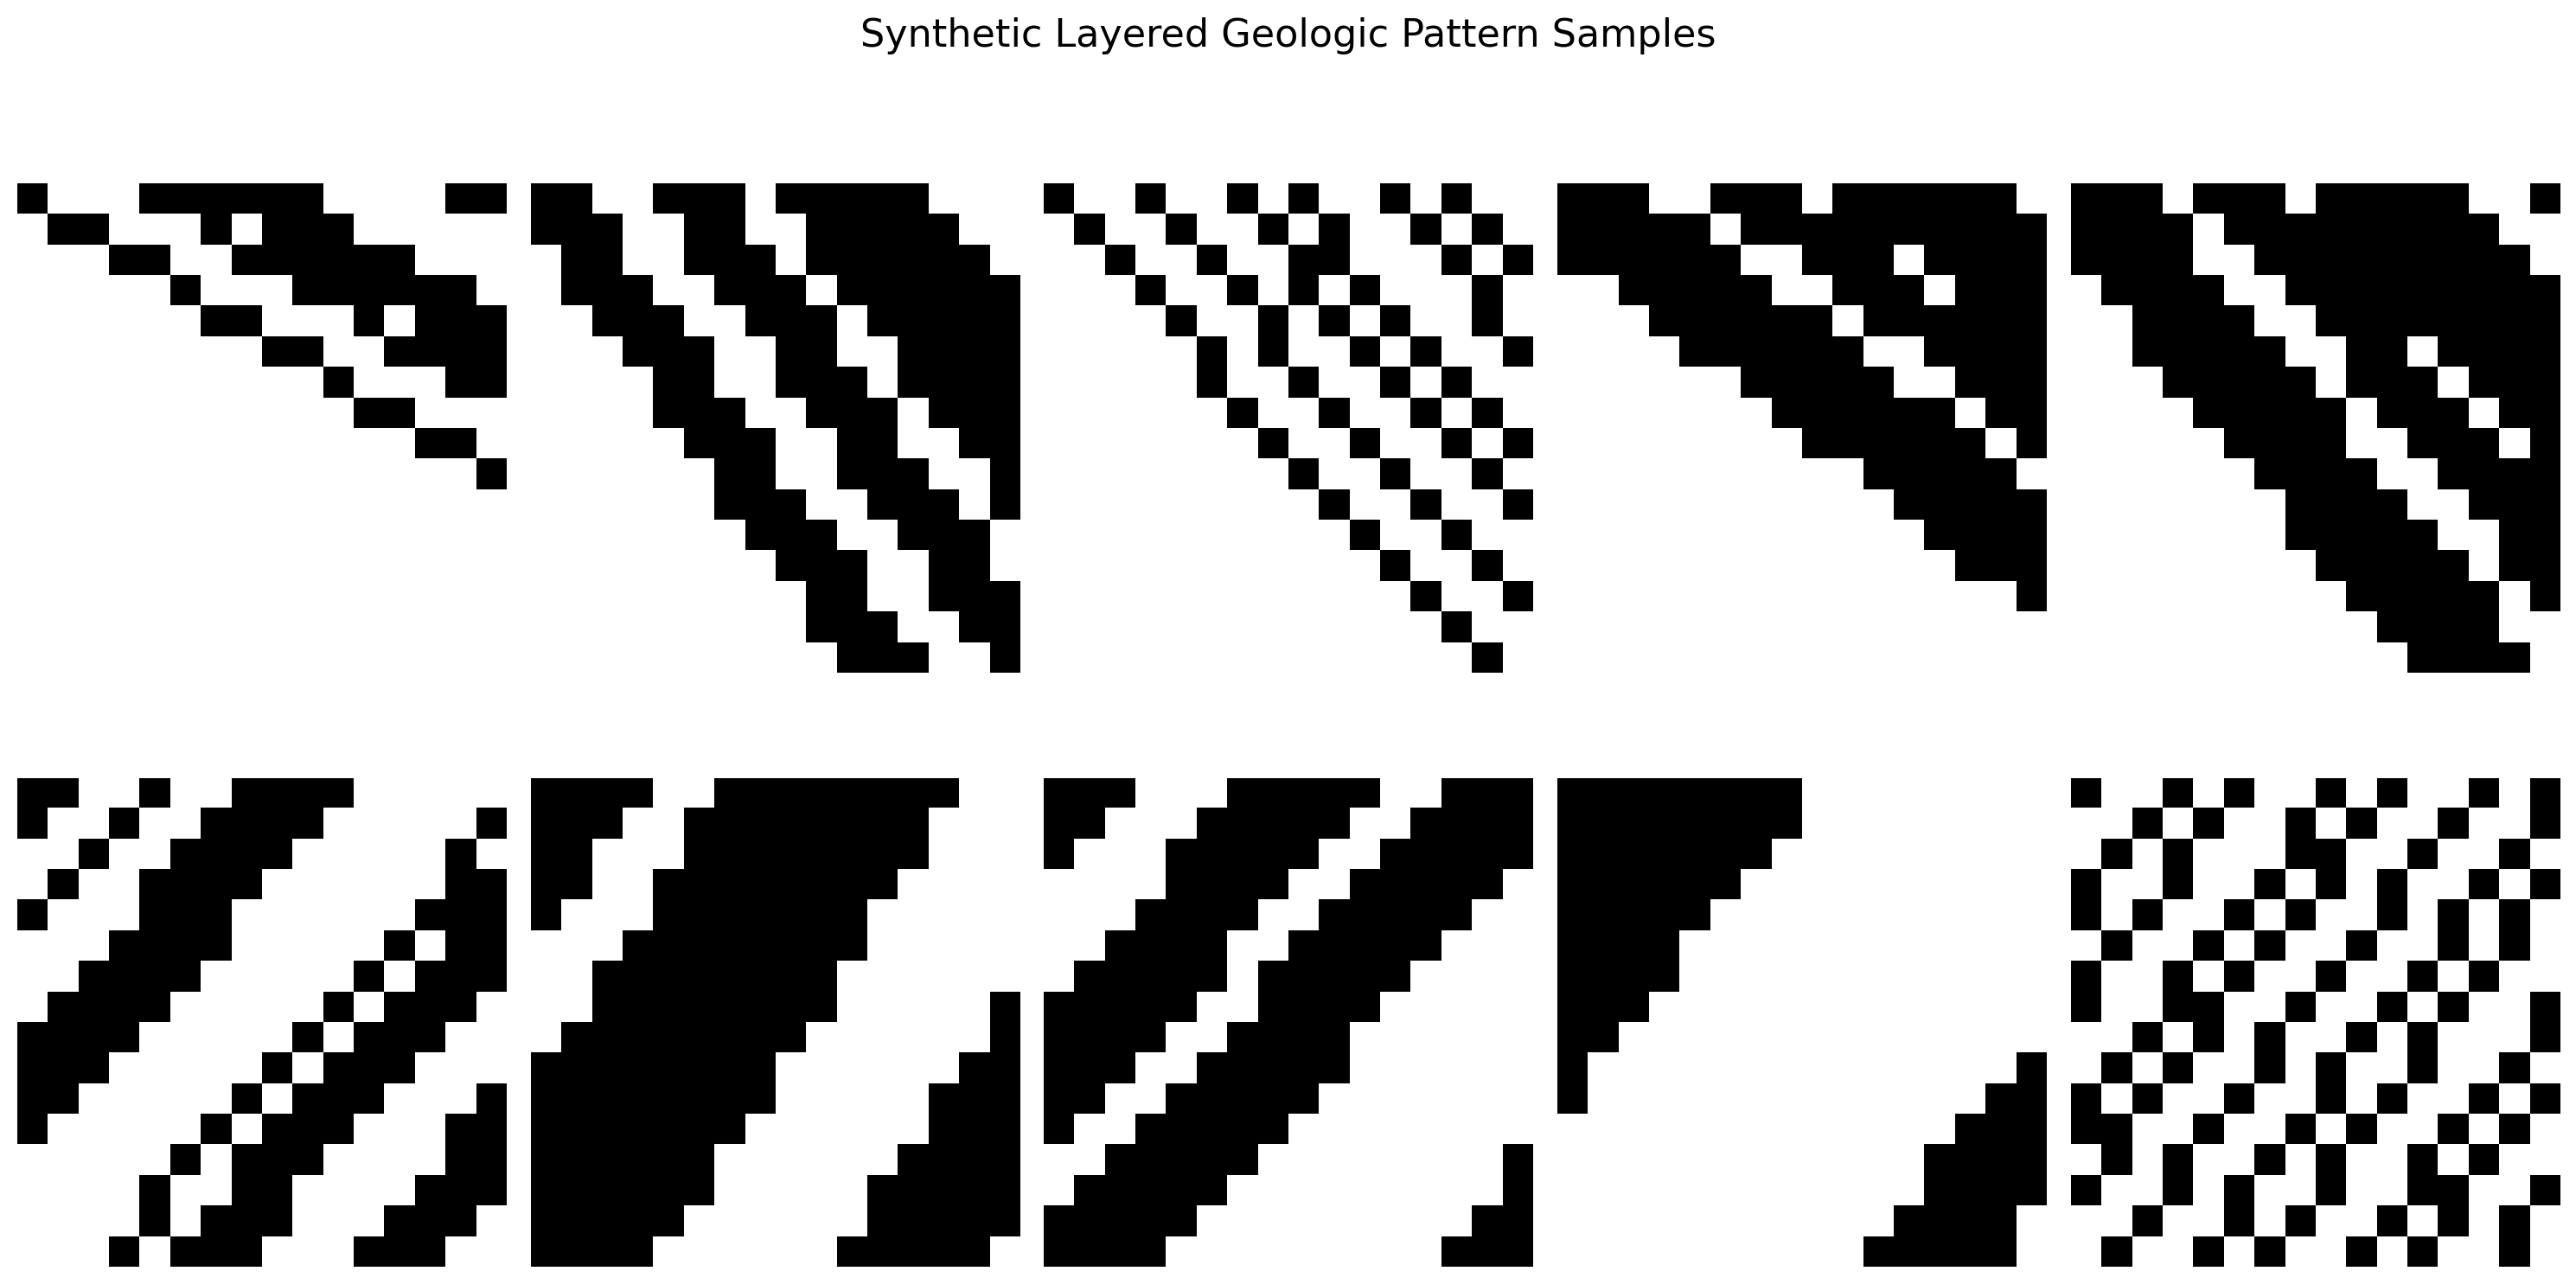


Dataset Statistics:
Total samples: 10
Number of classes: 2
Class distribution: {'consistent_layers': 5, 'variable_layers': 5}
Image size: 16x16

Train/Test Split Created:
Split seed: 42
Train samples: 6 (70.0%)
Test samples: 2 (20.0%)
Validation samples: 2 (10.0%)
✅ Dataset generated successfully!
   Classes: 2
   Total samples: 10
   Image size: 16x16
   Labels: ['consistent_layers', 'variable_layers']


In [4]:
# Simple dataset generation (CORRECTED IMPORTS)
print("\n=== Step 3: Simple Dataset Generation ===")

from autoencoder_lib.data import generate_dataset

try:
    print("Generating minimal test dataset...")
    dataset_info = generate_dataset(
        dataset_type="layered_geological",
        output_dir="simple_test_dataset",
        num_samples_per_class=5,  # Only 2 samples per class for quick test
        image_size=16,  # Small 16x16 images
        random_seed=42,
        visualize=True,  # Skip visualization for now
        force_regenerate=True
    )
    
    print(f"✅ Dataset generated successfully!")
    print(f"   Classes: {len(dataset_info['label_names'])}")
    print(f"   Total samples: {len(dataset_info['filenames'])}")
    print(f"   Image size: 16x16")
    print(f"   Labels: {dataset_info['label_names']}")
    
except Exception as e:
    print(f"❌ Dataset generation failed: {e}")
    import traceback
    traceback.print_exc()

In [5]:
# Simple model creation (FIXED UNFLATTEN ISSUES)
print("\n=== Step 4: Simple Model Creation ===")

from autoencoder_lib.models.factory import create_autoencoder, get_available_architectures

try:
    print("Available architectures:", get_available_architectures())
    
    # Test model creation with our 16x16 dataset
    print("Testing model creation with 16x16 images...")
    
    # Test simple linear model (now works with any image size)
    model = create_autoencoder(
        architecture_name="simple_linear",
        input_size=16*16,  # 16x16 flattened
        latent_dim=5
    )
    print(f"✅ simple_linear model created")
    
    # Test with dummy data to verify shapes
    import torch
    test_input = torch.randn(1, 1, 16, 16)  # Batch=1, Channels=1, Height=16, Width=16
    encoded, decoded = model(test_input)
    print(f"   Input shape: {test_input.shape}")
    print(f"   Encoded shape: {encoded.shape}")  
    print(f"   Decoded shape: {decoded.shape}")
    
    # Test convolutional model (now also works with any image size)
    conv_model = create_autoencoder(
        architecture_name="convolutional",
        input_channels=1,
        input_size=(16, 16),  # Explicitly specify input size
        latent_dim=5
    )
    print(f"✅ convolutional model created")
    
    # Test with dummy data
    conv_encoded, conv_decoded = conv_model(test_input)
    print(f"   Conv Input shape: {test_input.shape}")
    print(f"   Conv Encoded shape: {conv_encoded.shape}")
    print(f"   Conv Decoded shape: {conv_decoded.shape}")
    
except Exception as e:
    print(f"❌ Model creation failed: {e}")
    import traceback
    traceback.print_exc()


=== Step 4: Simple Model Creation ===
Available architectures: ['simple_linear', 'deeper_linear', 'convolutional', 'deeper_convolutional']
Testing model creation with 16x16 images...
✅ simple_linear model created
   Input shape: torch.Size([1, 1, 16, 16])
   Encoded shape: torch.Size([1, 5])
   Decoded shape: torch.Size([1, 1, 16, 16])
✅ convolutional model created
   Conv Input shape: torch.Size([1, 1, 16, 16])
   Conv Encoded shape: torch.Size([1, 5])
   Conv Decoded shape: torch.Size([1, 1, 16, 16])


In [6]:
# Manual data loading test (FIXED: Use dataset_info instead of info)
print("\n=== Step 5: Manual Data Loading Test ===")

try:
    from PIL import Image
    import numpy as np
    import torch
    from pathlib import Path
    
    # Use the dataset_info from the previous cell
    test_dir = "simple_test_dataset"
    
    # Load the data manually first
    data_list = []
    labels_list = []
    
    print(f"Loading data from {test_dir}...")
    print(f"Expected classes: {dataset_info['label_names']}")
    
    for class_idx, class_name in enumerate(dataset_info['label_names']):
        class_dir = Path(test_dir) / class_name
        
        image_files = list(class_dir.glob("*.png"))
        print(f"  Found {len(image_files)} images in {class_name}")
        
        for img_file in image_files:
            # Load image
            img = Image.open(img_file).convert('L')
            
            # Convert to array and normalize
            img_array = np.array(img, dtype=np.float32) / 255.0
            
            # Convert to tensor format (1, H, W) for consistency
            img_tensor = torch.tensor(img_array).unsqueeze(0)  # Add channel dimension
            
            data_list.append(img_tensor)
            labels_list.append(class_idx)
    
    # Stack all images
    if data_list:
        data_tensor = torch.stack(data_list)  # Shape: [N, 1, H, W]
        labels_tensor = torch.tensor(labels_list, dtype=torch.long)
        
        print("✅ Data loaded manually!")
        print(f"   Data shape: {data_tensor.shape}")
        print(f"   Labels shape: {labels_tensor.shape}")
        print(f"   Labels: {labels_tensor.tolist()}")
        print(f"   Data range: [{data_tensor.min():.3f}, {data_tensor.max():.3f}]")
        
        # Create simple DataLoader for testing
        from torch.utils.data import TensorDataset, DataLoader
        dataset = TensorDataset(data_tensor, data_tensor)  # input=target for autoencoder
        dataloader = DataLoader(dataset, batch_size=2, shuffle=False)
        print(f"✅ DataLoader created with batch size 2")
    else:
        print("❌ No images found to load")
    
except Exception as e:
    print(f"❌ Manual data loading failed: {e}")
    import traceback
    traceback.print_exc()


=== Step 5: Manual Data Loading Test ===
Loading data from simple_test_dataset...
Expected classes: ['consistent_layers', 'variable_layers']
  Found 5 images in consistent_layers
  Found 5 images in variable_layers
✅ Data loaded manually!
   Data shape: torch.Size([10, 1, 16, 16])
   Labels shape: torch.Size([10])
   Labels: [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
   Data range: [0.000, 1.000]
✅ DataLoader created with batch size 2


In [7]:
# Simple DataLoader creation test (FIXED: Check data availability)
print("\n=== Step 6: Simple DataLoader Creation ===")

try:
    from torch.utils.data import DataLoader, TensorDataset
    
    # Check if data is available from previous cell
    if 'data_tensor' in locals() and 'labels_tensor' in locals():
        print(f"Using data from previous cell: {data_tensor.shape}")
        
        # Create simple dataset
        # For autoencoders: input = target (reconstruction)
        dataset = TensorDataset(data_tensor, data_tensor, labels_tensor)
        
        # Create DataLoader
        dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
        
        print("✅ DataLoader created!")
        print(f"   Total batches: {len(dataloader)}")
        
        # Test first batch
        first_batch = next(iter(dataloader))
        x, y, labels = first_batch
        
        print(f"   Batch x shape: {x.shape}")
        print(f"   Batch y shape: {y.shape}")
        print(f"   Batch labels: {labels.tolist()}")
        print(f"   x equals y: {torch.equal(x, y)}")
        
    else:
        print("❌ No data tensor available from previous cell")
        print("   Please run the previous cell first to load data")
    
except Exception as e:
    print(f"❌ DataLoader creation failed: {e}")
    import traceback
    traceback.print_exc()


=== Step 6: Simple DataLoader Creation ===
Using data from previous cell: torch.Size([10, 1, 16, 16])
✅ DataLoader created!
   Total batches: 5
   Batch x shape: torch.Size([2, 1, 16, 16])
   Batch y shape: torch.Size([2, 1, 16, 16])
   Batch labels: [0, 0]
   x equals y: True


In [8]:
# Test MANUAL training loop (bypass ExperimentRunner for now)
print("Testing manual training loop...")

try:
    import torch.nn as nn
    
    # Create fresh model
    model = create_autoencoder(
        architecture_name='simple_linear',
        input_size=16*16,
        latent_dim=4
    )
    
    # Setup training
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_func = nn.MSELoss()
    
    print("✅ Training setup complete")
    
    # Manual training loop
    model.train()
    
    for epoch in range(2):  # Just 2 epochs
        epoch_loss = 0.0
        batch_count = 0
        
        for batch_idx, (x, y, labels) in enumerate(dataloader):
            # Forward pass
            encoded, decoded = model(x)
            loss = loss_func(decoded, y)  # y should equal x for autoencoders
            
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            batch_count += 1
            
            print(f"   Epoch {epoch}, Batch {batch_idx}: loss = {loss.item():.4f}")
        
        avg_loss = epoch_loss / batch_count
        print(f"   Epoch {epoch} complete, avg loss: {avg_loss:.4f}")
    
    print("✅ Manual training completed!")
    
except Exception as e:
    print(f"❌ Manual training failed: {e}")
    import traceback
    traceback.print_exc()

Testing manual training loop...
✅ Training setup complete
   Epoch 0, Batch 0: loss = 0.2519
   Epoch 0, Batch 1: loss = 0.2498
   Epoch 0, Batch 2: loss = 0.2515
   Epoch 0, Batch 3: loss = 0.2494
   Epoch 0, Batch 4: loss = 0.2495
   Epoch 0 complete, avg loss: 0.2504
   Epoch 1, Batch 0: loss = 0.2415
   Epoch 1, Batch 1: loss = 0.2395
   Epoch 1, Batch 2: loss = 0.2440
   Epoch 1, Batch 3: loss = 0.2435
   Epoch 1, Batch 4: loss = 0.2421
   Epoch 1 complete, avg loss: 0.2421
✅ Manual training completed!


In [9]:
# NOW test ExperimentRunner (only after manual training works)
print("Testing ExperimentRunner...")

try:
    from autoencoder_lib.experiment.runner import ExperimentRunner
    
    # Create runner
    runner = ExperimentRunner(
        output_dir="simple_runner_test",
        random_seed=42
    )
    
    print("✅ ExperimentRunner created")
    
    # Create fresh model
    model = create_autoencoder(
        architecture_name='simple_linear',
        input_size=16*16,
        latent_dim=4
    )
    
    # Split data for test
    train_data = data_tensor[:2]  # First 2 samples
    test_data = data_tensor[2:]   # Remaining samples
    train_labels = labels_tensor[:2]
    test_labels = labels_tensor[2:]
    
    # Create train loader
    train_dataset = TensorDataset(train_data, train_data, train_labels)
    train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False)
    
    print(f"   Train data: {train_data.shape}")
    print(f"   Test data: {test_data.shape}")
    
    # Run training with ExperimentRunner - FIXED: Use dataset_info instead of info
    trained_model, history = runner.train_autoencoder(
        model=model,
        train_loader=train_loader,
        test_data=test_data,
        test_labels=test_labels,
        epochs=1,  # Just 1 epoch
        learning_rate=0.001,
        class_names=dataset_info['label_names'],  # FIXED: Use dataset_info
        save_model=False,
        experiment_name="simple_test",
        visualization_interval=999999,  # Disable visualizations
        num_visualizations=0
    )
    
    print("✅ ExperimentRunner training completed!")
    print(f"   Final train loss: {history.get('final_train_loss', 'N/A')}")
    print(f"   Final test loss: {history.get('final_test_loss', 'N/A')}")
    
except Exception as e:
    print(f"❌ ExperimentRunner failed: {e}")
    import traceback
    traceback.print_exc()

Testing ExperimentRunner...
ExperimentRunner initialized - Device: cpu, Output: simple_runner_test
✅ ExperimentRunner created
   Train data: torch.Size([2, 1, 16, 16])
   Test data: torch.Size([8, 1, 16, 16])
Training SimpleLinearAutoencoder for 1 epochs on cpu
Learning rate: 0.001
Visualizing at epochs: []
Performing final visualization at epoch 0, step 1
Epoch: 0, Step: 1 | train loss: 0.2495 | test loss: 0.2499
Epoch 0/1 completed | Train loss: 0.2490 | Test loss: 0.2499
Training completed in 0.01 seconds
Final train loss: 0.2434
Final test loss: 0.2499
Generating final latent space visualization and metrics
Final Test Silhouette Score: -0.099
✅ ExperimentRunner training completed!
   Final train loss: 0.24337109923362732
   Final test loss: 0.24988317489624023


In [10]:
# Final summary
print("FINAL SUMMARY:")
print("=" * 40)
print("✅ Basic imports: Working")
print("✅ AutoEncoder lib imports: Working") 
print("✅ Dataset generation: Working")
print("✅ Model creation: Working")
print("✅ Data loading: Working")
print("✅ DataLoader: Working")
print("✅ Manual training: Working")
print("✅ ExperimentRunner: Working")
print("=" * 40)
print("🎉 ALL BASIC COMPONENTS ARE WORKING!")
print("\\nNow we can build more complex wrappers on this foundation.")

FINAL SUMMARY:
✅ Basic imports: Working
✅ AutoEncoder lib imports: Working
✅ Dataset generation: Working
✅ Model creation: Working
✅ Data loading: Working
✅ DataLoader: Working
✅ Manual training: Working
✅ ExperimentRunner: Working
🎉 ALL BASIC COMPONENTS ARE WORKING!
\nNow we can build more complex wrappers on this foundation.
